In [2]:
import os.path as op
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

bids_folder = '/shares/zne.uzh/mrenke/ds-dnumrisk'
subjects = [int(f[4:]) for f in os.listdir(bids_folder) if f[0:3] == 'sub' and len(f) == 6]


In [3]:
from numrisk.utils.data import get_data_magjduge

df = get_data_magjduge(bids_folder=bids_folder)
df['log(n2)'] = np.log(df['n2'] )

df.head()

number of subjects found: 66


rt    n1    n2  choice  chose_n2      frac  \
subject run trial_nr                                                     
65      1   1         0.756062   7.0  11.0    True      True  1.571429   
            2         1.121011  20.0  28.0    True      True  1.400000   
            3         1.105644   5.0   3.0   False     False  0.600000   
            4         0.938777  20.0  33.0    True      True  1.650000   
            5         0.771078   7.0   7.0   False     False  1.000000   

                      log(n2/n1)   log(n1)  group   log(n2)  
subject run trial_nr                                         
65      1   1           0.451985  1.945910      0  2.397895  
            2           0.336472  2.995732      0  3.332205  
            3          -0.510826  1.609438      0  1.098612  
            4           0.500775  2.995732      0  3.496508  
            5           0.000000  1.945910      0  1.945910

In [5]:
from utils import get_decoding_info
n_stim = 2

pred_stim2 = []
for sub in subjects:
    pred_stim2.append(get_decoding_info(sub,n_stim=n_stim, bids_folder=bids_folder))

pred_stim2 = pd.concat(pred_stim2).join(df, how='inner')

import pingouin as pg

r = pred_stim2.groupby(['subject', 'group']).apply(lambda d: pg.corr(d['E'], d[f'log(n{n_stim})']))
r_stim2 = r.groupby(['subject','group'])['r'].mean()

/shares/zne.uzh/mrenke/ds-dnumrisk/derivatives/decoded_pdfs_stim2.volume.cv_vselect.denoise/sub-03/func/sub-03_ses-1_mask-NPC_R_space-T1w_pars.tsv
/shares/zne.uzh/mrenke/ds-dnumrisk/derivatives/decoded_pdfs_stim2.volume.cv_vselect.denoise/sub-21/func/sub-21_ses-1_mask-NPC_R_space-T1w_pars.tsv


/sctmp/mrenke/ipykernel_1743183/3929345.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  r = pred_stim2.groupby(['subject', 'group']).apply(lambda d: pg.corr(d['E'], d[f'log(n{n_stim})']))


In [7]:
n_stim = 1

pred_stim1 = []
for sub in subjects:
    pred_stim1.append(get_decoding_info(sub,n_stim=n_stim, bids_folder=bids_folder))

pred_stim1 = pd.concat(pred_stim1).join(df, how='inner')
r = pred_stim2.groupby(['subject', 'group']).apply(lambda d: pg.corr(d['E'], d[f'log(n{n_stim})']))
r_stim1 = r.groupby(['subject','group'])['r'].mean()



/shares/zne.uzh/mrenke/ds-dnumrisk/derivatives/decoded_pdfs_stim1.volume.cv_vselect.denoise/sub-03/func/sub-03_ses-1_mask-NPC_R_space-T1w_pars.tsv


/sctmp/mrenke/ipykernel_1743183/1269002447.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  r = pred_stim2.groupby(['subject', 'group']).apply(lambda d: pg.corr(d['E'], d[f'log(n{n_stim})']))


64


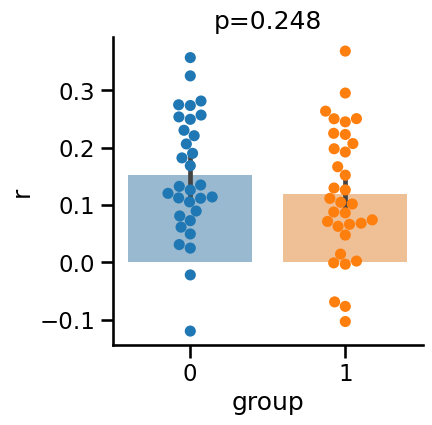

In [6]:
temp = r_stim2

y_var = 'r'
an = pg.anova(data=temp.reset_index(), dv=y_var, between='group')
p_val = np.round(an['p-unc'][0],3)

sns.set_context('talk')
fig, ax = plt.subplots(figsize=(4,4))
sns.barplot(ax=ax,data=temp.reset_index(), x='group', y=y_var, alpha=0.5, hue='group', legend=False)
sns.swarmplot(ax=ax, data=temp.reset_index(), x='group', y=y_var,  hue='group',size=8,legend=False)
ax.set(title=f'p={p_val}') # ylim=(0.5,1),
sns.despine()
print(len(temp))

In [8]:
rs = pd.DataFrame(r_stim2).rename(columns ={'r':'r_stim2'}).join(pd.DataFrame(r_stim1).rename(columns ={'r':'r_stim1'}))

rs['dif'] = rs['r_stim1'] - rs['r_stim2']

/sctmp/mrenke/ipykernel_1743183/4039930290.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  r_ = np.round(cor['r'][0], 2)
/sctmp/mrenke/ipykernel_1743183/4039930290.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = np.round(cor['p-val'][0], 3)


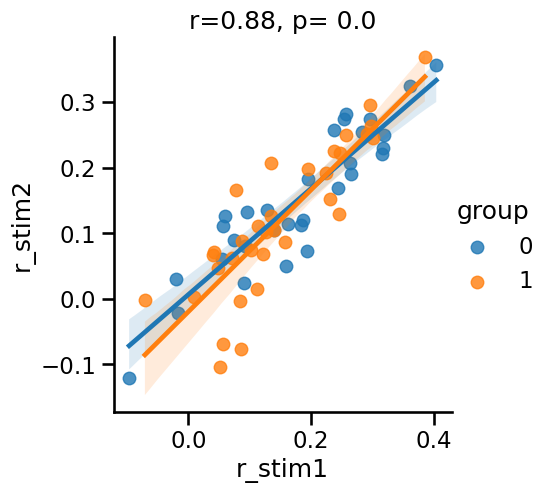

In [9]:
df_comb = rs

y_var = 'r_stim2' 
x_var = 'r_stim1' 

cor = pg.corr(df_comb[y_var], df_comb[x_var])
r_ = np.round(cor['r'][0], 2)
p = np.round(cor['p-val'][0], 3)

fig = sns.lmplot(x=x_var, y=y_var, data=df_comb.reset_index(),hue='group') # 
fig.set(title=f'r={r_}, p= {p}') 

64


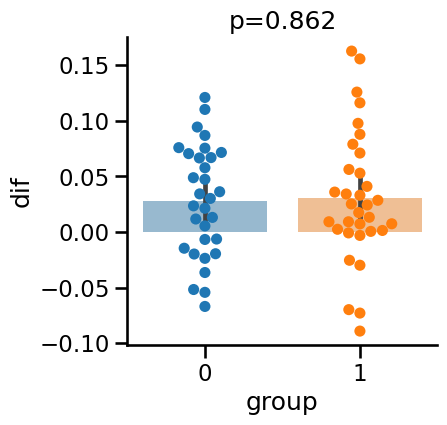

In [11]:
temp = rs

y_var = 'dif'
an = pg.anova(data=temp.reset_index(), dv=y_var, between='group')
p_val = np.round(an['p-unc'][0],3)

sns.set_context('talk')
fig, ax = plt.subplots(figsize=(4,4))
sns.barplot(ax=ax,data=temp.reset_index(), x='group', y=y_var, alpha=0.5, hue='group', legend=False)
sns.swarmplot(ax=ax, data=temp.reset_index(), x='group', y=y_var,  hue='group',size=8,legend=False)
ax.set(title=f'p={p_val}') # ylim=(0.5,1),
sns.despine()
print(len(temp))

In [41]:
rs

,,r_stim2,r_stim1
subject,group,,
1,0,0.089422,0.074778
2,1,-0.103337,0.052228
4,1,0.047506,0.048840
5,0,0.049439,0.159580
6,1,-0.001015,-0.070851
7,0,0.112274,0.183733
8,1,0.129582,0.245647
11,1,0.207114,0.134177
12,0,0.273560,0.253711
